## Coursera Reviews Analysis
#### for Data Science and Machine Learning(As, Coursera is most popular for Machine Learning Courses)

<img src="http://blogs.bmc.com/wp-content/uploads/2018/02/Extending-IT-Service-Management-Beyond-IT-_700x400_2-700x400_preview.jpg" width="800px">

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for providing path
import os
print(os.listdir('../input'))

['kaggle-survey-2018', '100k-courseras-course-reviews-dataset']


**Reading the Data**

In [2]:
# reading the data

import warnings
warnings.filterwarnings('ignore')

reviewbycourse = pd.read_csv("../input/100k-courseras-course-reviews-dataset/reviews_by_course.csv")
review = pd.read_csv('../input/100k-courseras-course-reviews-dataset/reviews.csv')
survey = pd.read_csv('../input/kaggle-survey-2018/SurveySchema.csv')
response = pd.read_csv('../input/kaggle-survey-2018/freeFormResponses.csv')
mcresponse = pd.read_csv('../input/kaggle-survey-2018/multipleChoiceResponses.csv')

# getting the shape
print("Shape of Reviews by Course Dataset", reviewbycourse.shape)
print("Shape of Reviews Dataset", review.shape)
print("Shape of Survey Dataset", survey.shape)
print("Shape of Response Dataset", response.shape)
print("Shape of multiple choice Response Dataset", mcresponse.shape)


Shape of Reviews by Course Dataset (140320, 3)
Shape of Reviews Dataset (107018, 3)
Shape of Survey Dataset (12, 52)
Shape of Response Dataset (23860, 35)
Shape of multiple choice Response Dataset (23860, 395)


In [3]:
# checking the head

reviewbycourse.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


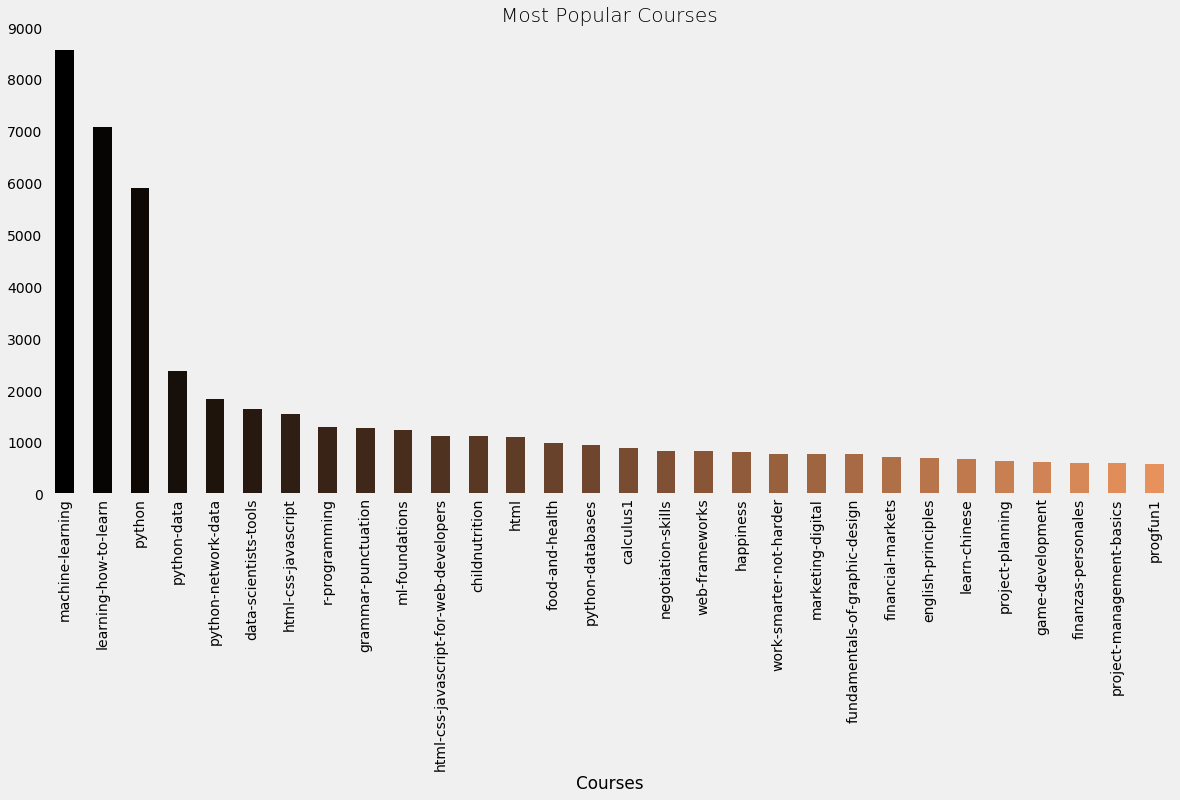

In [4]:
# looking at the most popularcourses

plt.rcParams['figure.figsize'] = (18, 8)
plt.style.use('fivethirtyeight')

color = plt.cm.copper(np.linspace(0, 2, 80))
reviewbycourse['CourseId'].value_counts().head(30).plot.bar(color = color)
plt.title('Most Popular Courses', fontsize = 20, fontweight = 30)
plt.xlabel('Courses')
plt.grid()
plt.show()

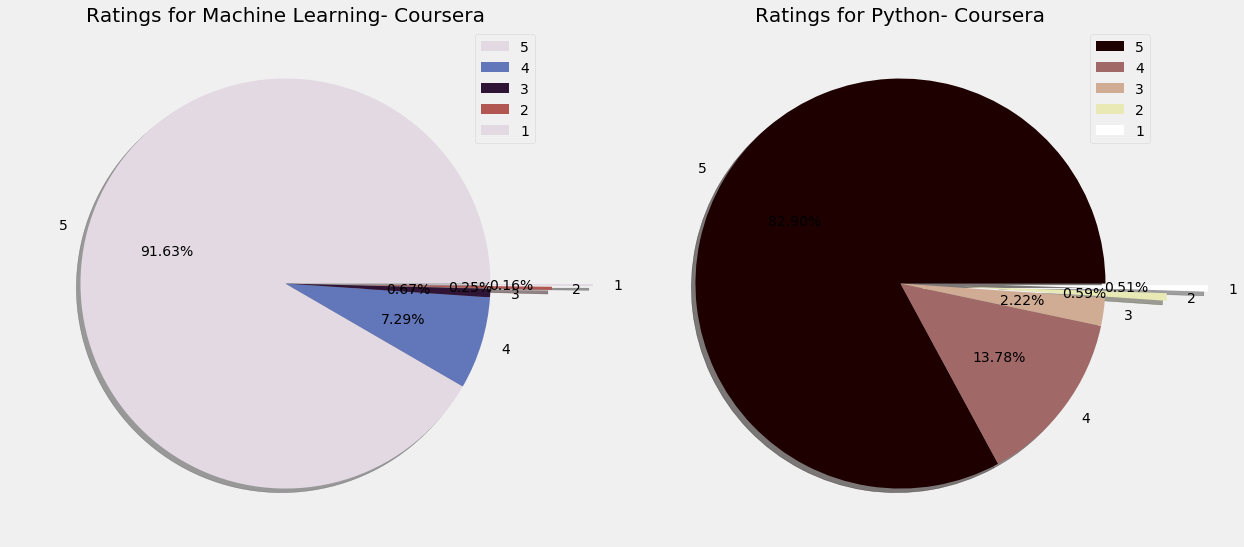

In [5]:
# plotting ratings of machine learning and python

plt.rcParams['figure.figsize'] = (18, 10)

rating = reviewbycourse['Label'][reviewbycourse['CourseId'] == 'machine-learning']
plt.subplot(1, 2, 1)
colors = plt.cm.twilight(np.linspace(0, 1, 5))
rating.value_counts().plot.pie(colors = colors,
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Machine Learning- Coursera', fontsize = 20)
plt.legend()

pyrating = reviewbycourse['Label'][reviewbycourse['CourseId'] == 'python']

plt.subplot(1, 2, 2)
colors = plt.cm.pink(np.linspace(0, 1, 5))
pyrating.value_counts().plot.pie(colors = colors,
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Python- Coursera', fontsize = 20)
plt.legend()
plt.show()

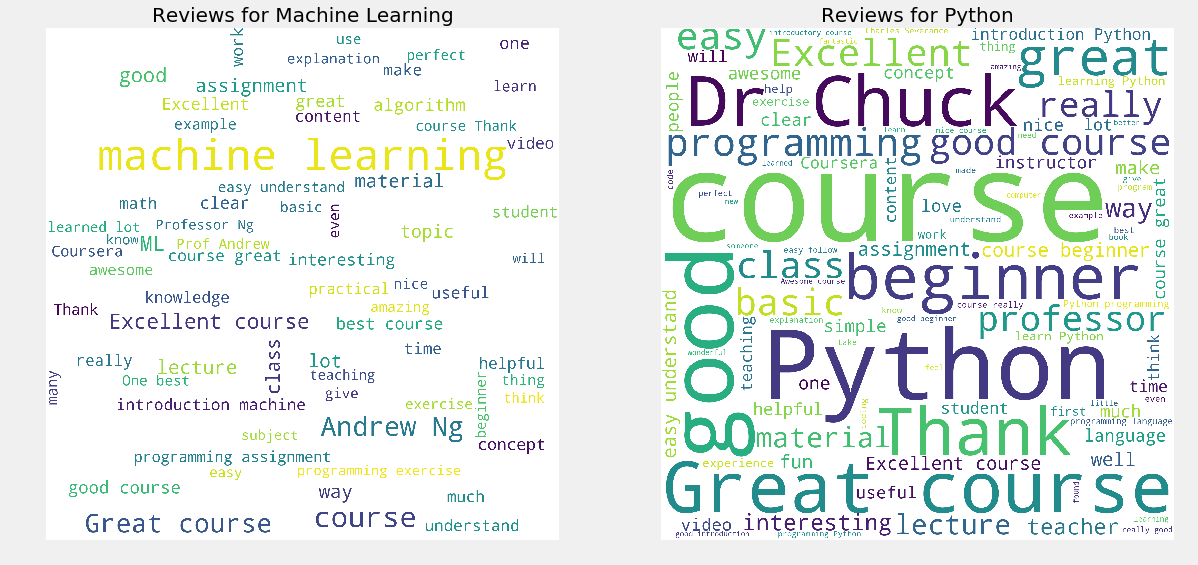

In [6]:
# let's check review for machine learning

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

mlreview = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['CourseId'] == 'machine-learning']])
plt.rcParams['figure.figsize'] = (18, 18)

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 70).generate(mlreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Machine Learning', fontsize = 20)

pyreview = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['CourseId'] == 'python']])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(pyreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Python', fontsize = 20)

plt.show()

In [7]:
# data cleaning

response['Q15_OTHER_TEXT'].replace('DigitalOcean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('digital ocean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('digitalocean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('Digitalocean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('Digital ocean', 'Digital Ocean', inplace = True)

response['Q15_OTHER_TEXT'].replace('none', 'None', inplace = True)
response['Q15_OTHER_TEXT'].replace('DigitalOcean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('Oracle', 'Oracle Cloud', inplace = True)
response['Q15_OTHER_TEXT'].replace('oracle', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('DigitalOcean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('tencent cloud', 'Tencent Cloud', inplace = True)

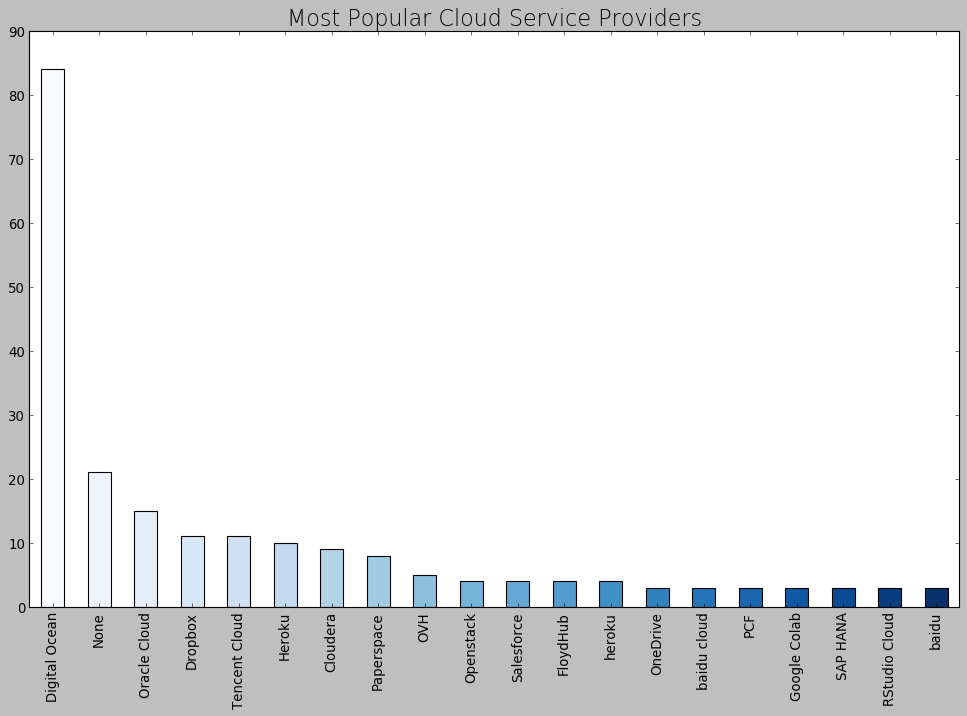

In [8]:

plt.style.use('_classic_test')

color = plt.cm.Blues(np.linspace(0, 1, 20))
response['Q15_OTHER_TEXT'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))
plt.title('Most Popular Cloud Service Providers', fontsize = 20, fontweight = 30)
plt.show()

In [9]:
# cleaning the q12 text
# use of primary tool

response['Q12_Part_4_TEXT'].replace('JupyterLab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyterlab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyterlab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Notebooks', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyter notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyter notebooks', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyter', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterNotebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Lab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('local Jupyter / Python scripts', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter noebooks', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, Anaconda, Keras, XGBoost, SHAP', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterNoteBook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter notebooks', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter ', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupiter', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyterLab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, vscode', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter* ,RStudio, custom tools', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, Sublime Text', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyter googlecolab', 'Jupyter', inplace = True)

response['Q12_Part_4_TEXT'].replace('Jupyter lab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupiter notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter* , RStudio, custom tools', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Local Jupyter', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, Zeppelin', 'Jupyter', inplace = True)

response['Q12_Part_4_TEXT'].replace('RStudio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R, Python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Jupyter', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, JupyterLab', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('rstudio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Jupyter Notebook', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R and Python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio ', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('r', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R, python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R AND STATA', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio on laptop servers and cloud ', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio & JupyterLab', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Anaconda, ClearVu', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio (primary) and SAS (secondary)', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio and python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R, Matlab, Python', 'R', inplace = True)


response['Q12_Part_4_TEXT'].replace('Jupiter notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, RStudio', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('python', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python, JupterLab', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python, R', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python, Jupyter Notebook',  'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio on laptop servers and cloud', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio and JupyterLab ', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Spyder', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R Studio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio ', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R studio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter notebook ', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Notebook ', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python and R', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python, Jupyter', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('PyCharm', 'Pycharm', inplace = True)
response['Q12_Part_4_TEXT'].replace('anaconda', 'Anaconda', inplace = True)
response['Q12_Part_4_TEXT'].replace('spyder', 'Spyder', inplace = True)
response['Q12_Part_4_TEXT'].replace('MATLAB', 'Matlab', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Notebook ', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python ', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Pycharm ', 'Pycharm', inplace = True)


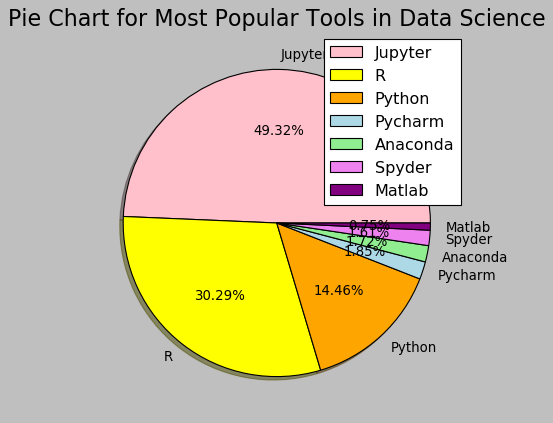

In [10]:
# Top 7 Platforms

response['Q12_Part_4_TEXT'].value_counts().head(7).plot.pie(colors = ['pink', 'yellow', 'orange','lightblue', 'lightgreen',
                                                                     'violet', 'purple'],
                                                            labels = ['Jupyter', 'R', 'Python', 'Pycharm', 'Anaconda', 'Spyder', 'Matlab'],
                                                           autopct = '%.2f%%', shadow = True)
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Pie Chart for Most Popular Tools in Data Science', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

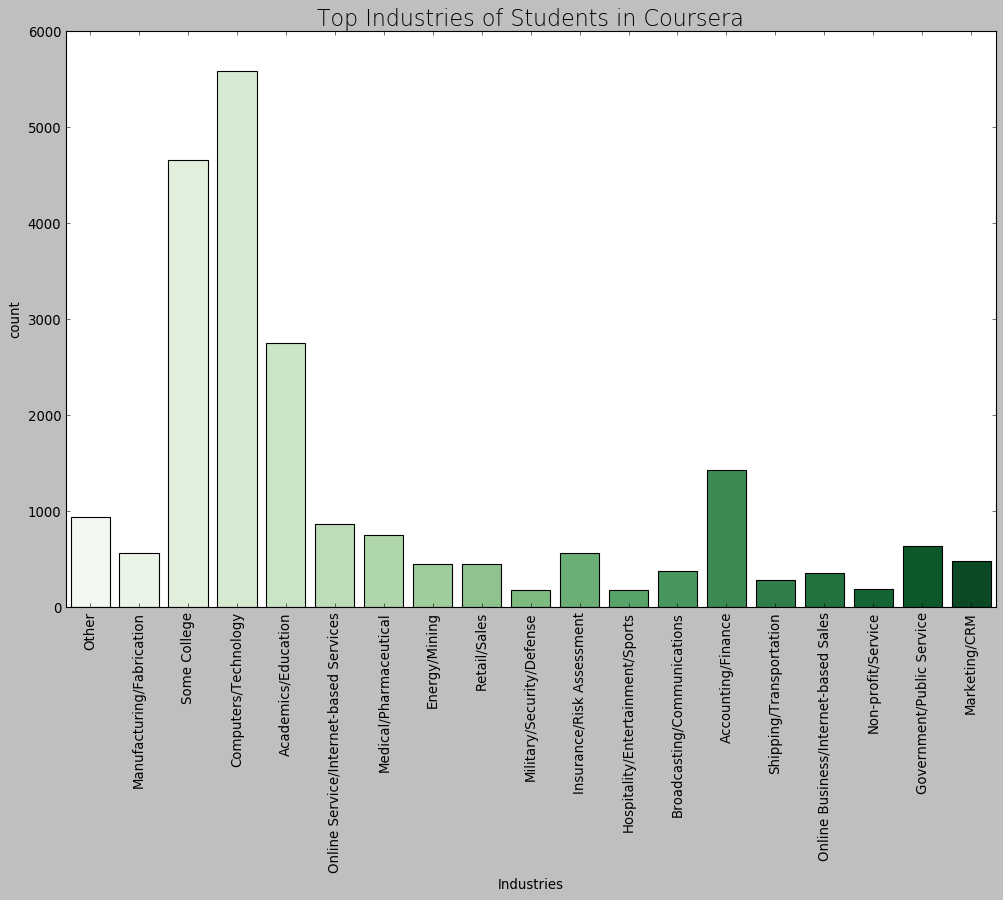

In [11]:
# data cleaning
mcresponse['Q7'].replace('In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice', 'Other', inplace = True)
mcresponse['Q7'].replace('I am a student', 'Some College', inplace = True)

# countplot

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(mcresponse['Q7'], palette = 'Greens')
plt.title('Top Industries of Students in Coursera', fontsize = 20, fontweight = 30)
plt.xlabel('Industries')
plt.xticks(rotation = 90)
plt.show()

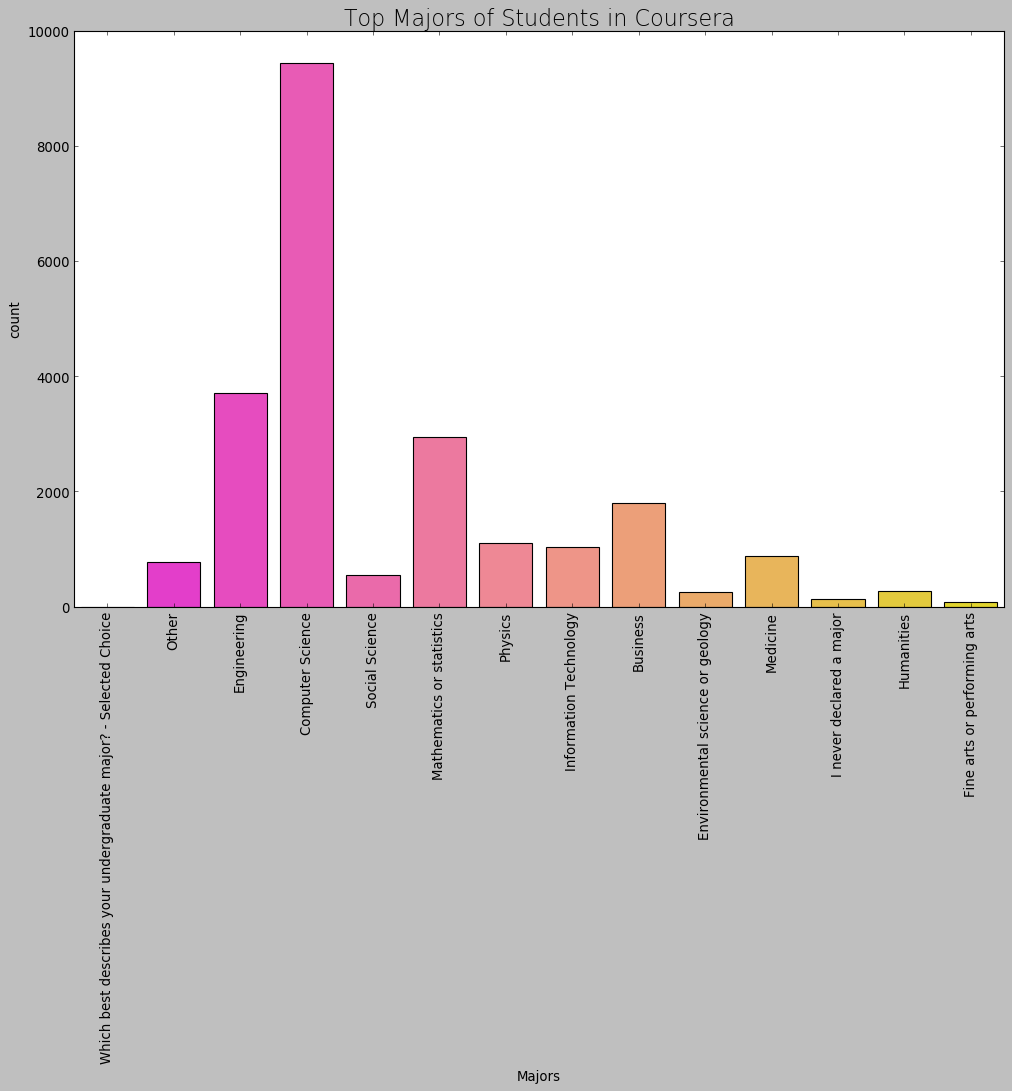

In [12]:
# data cleaning

mcresponse['Q5'].replace('Computer science (software engineering, etc.)', 'Computer Science', inplace = True)
mcresponse['Q5'].replace('Engineering (non-computer focused)', 'Engineering', inplace = True)
mcresponse['Q5'].replace('A business discipline (accounting, economics, finance, etc.)', 'Business', inplace = True)
mcresponse['Q5'].replace('Physics or astronomy', 'Physics', inplace = True)
mcresponse['Q5'].replace('Information technology, networking, or system administration', 'Information Technology', inplace = True)
mcresponse['Q5'].replace('Medical or life sciences (biology, chemistry, medicine, etc.)', 'Medicine', inplace = True)
mcresponse['Q5'].replace('Social sciences (anthropology, psychology, sociology, etc.)', 'Social Science', inplace = True)
mcresponse['Q5'].replace('Humanities (history, literature, philosophy, etc.)', 'Humanities', inplace = True)

# countplot
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(mcresponse['Q5'], palette = 'spring')
plt.title('Top Majors of Students in Coursera', fontsize = 20, fontweight = 30)
plt.xlabel('Majors')
plt.xticks(rotation = 90)
plt.show()

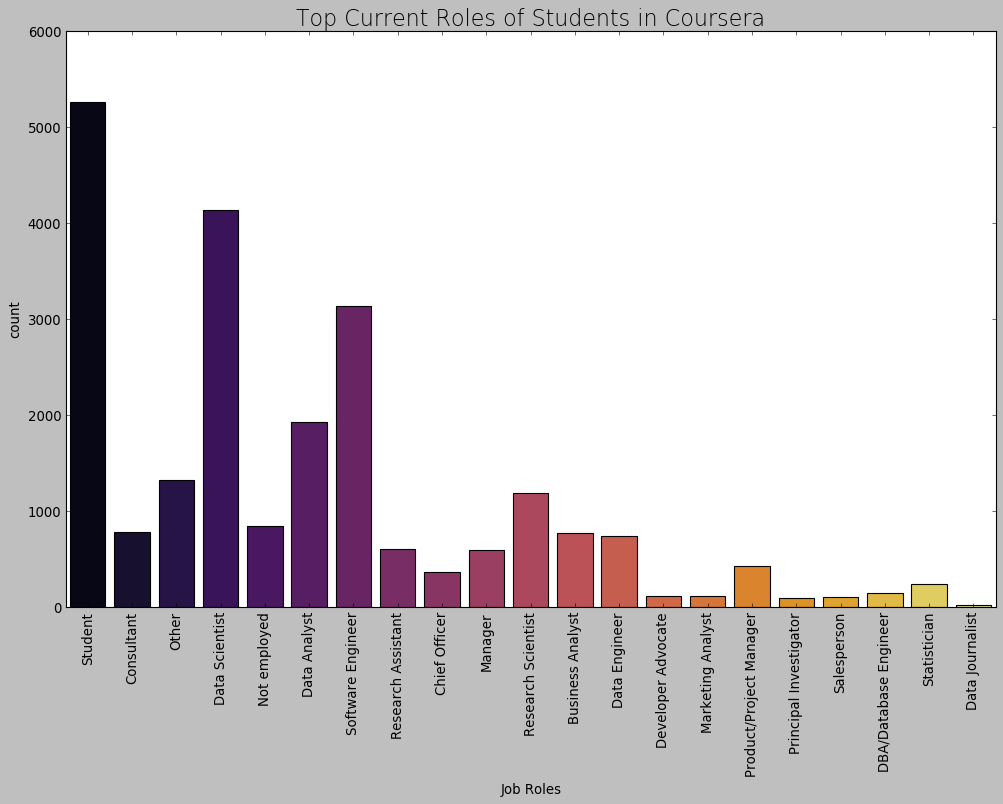

In [13]:
# data cleaning

mcresponse['Q6'].replace('Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'Student', inplace = True)

# countplot
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(mcresponse['Q6'], palette = 'inferno')
plt.title('Top Current Roles of Students in Coursera', fontsize = 20, fontweight = 30)
plt.xlabel('Job Roles')
plt.xticks(rotation = 90)
plt.show()

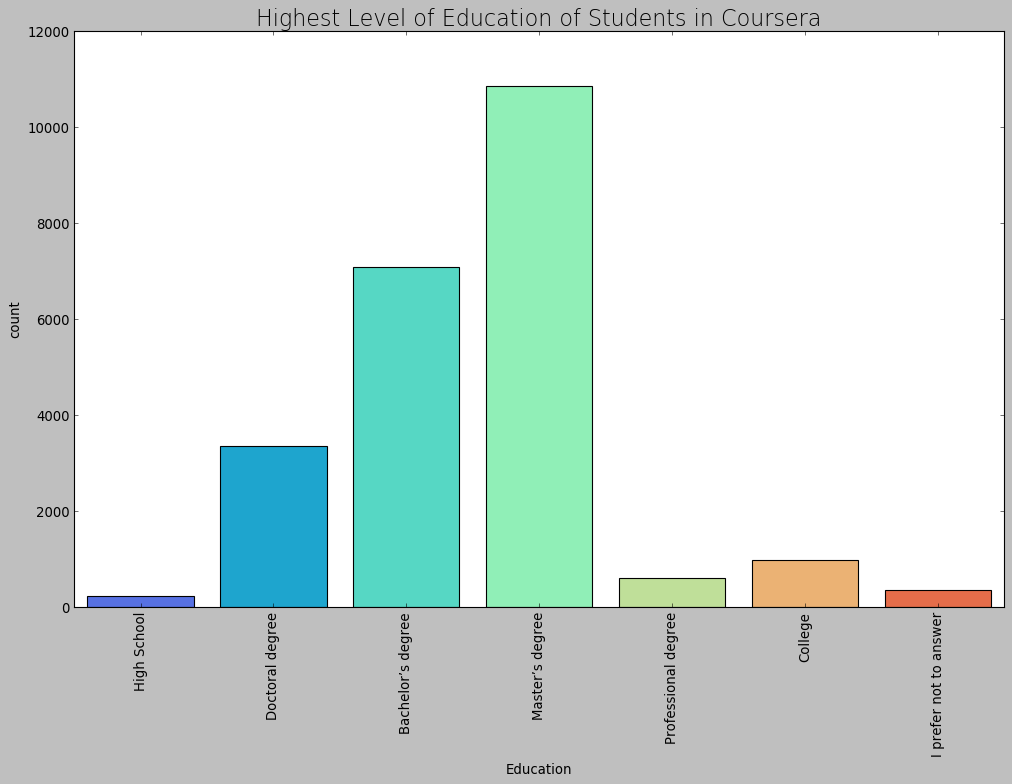

In [14]:
# data cleaning
mcresponse['Q4'].replace('No formal education past high school', 'High School', inplace = True)
mcresponse['Q4'].replace('Some college/university study without earning a bachelor’s degree', 'College', inplace = True)
mcresponse['Q4'].replace('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'High School', inplace = True)     

# countplot
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(mcresponse['Q4'], palette = 'rainbow')
plt.title('Highest Level of Education of Students in Coursera', fontsize = 20, fontweight = 30)
plt.xlabel('Education')
plt.xticks(rotation = 90)
plt.show()

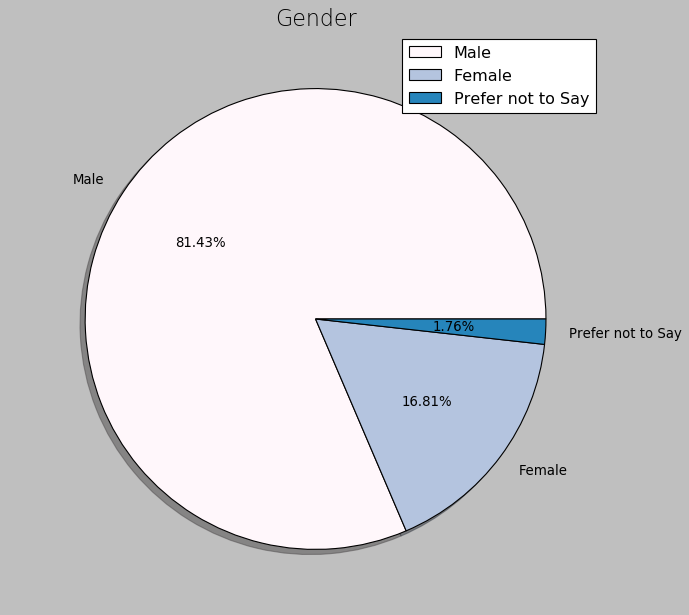

In [15]:
mcresponse['Q1'].replace('Prefer to self-describe', 'Prefer not to say', inplace = True)
mcresponse['Q1'].replace('What is your gender? - Selected Choice', 'Prefer not to say', inplace = True)

color = plt.cm.PuBu(np.linspace(0, 1, 4))
mcresponse['Q1'].value_counts().plot.pie(colors = color,
                                        labels = ['Male', 'Female', 'Prefer not to Say'],
                                        autopct = '%.2f%%',
                                        shadow = True)
plt.rcParams['figure.figsize'] = (9, 9)
plt.legend()
plt.axis('off')
plt.title('Gender', fontsize = 20, fontweight = 30)
plt.show()

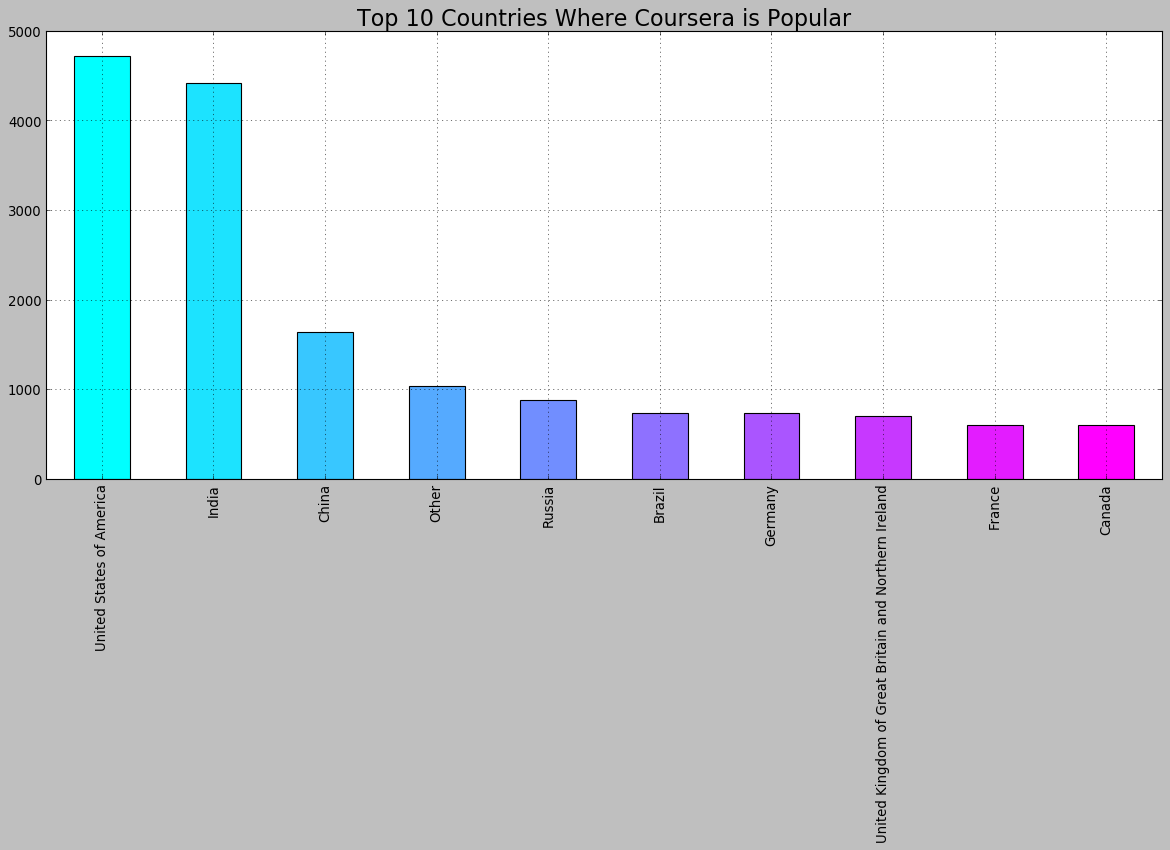

In [16]:
# top 50 countries where coursera is popular

color = plt.cm.cool(np.linspace(0, 1, 10))
mcresponse['Q3'].value_counts().head(10).plot.bar(figsize = (18, 7), color = color)
plt.title('Top 10 Countries Where Coursera is Popular', fontsize = 20)
plt.grid()
plt.show()

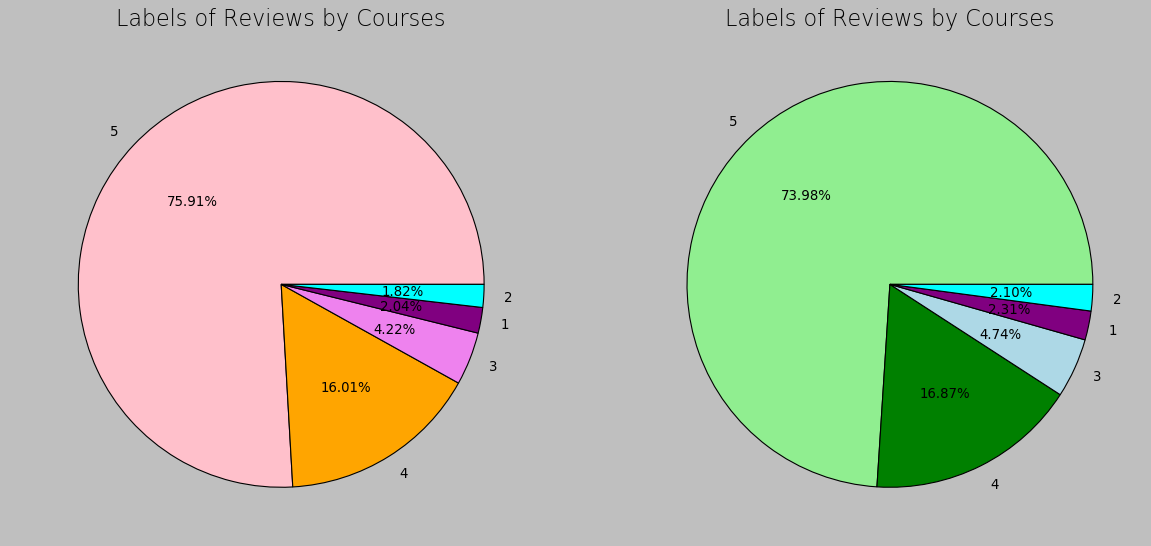

In [17]:
# checking different labels for reviews in reviews by courses

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
reviewbycourse['Label'].value_counts().plot.pie(colors = ['pink', 'orange', 'violet', 'purple', 'cyan'],
                                                labels = ["5", "4", "3", "1", "2"],
                                                autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)
review['Label'].value_counts().plot.pie(colors = ['lightgreen', 'green', 'lightblue', 'purple', 'cyan'],
                                        labels = ["5", "4", "3", "1", "2"],
                                        autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses', fontsize = 20, fontweight = 30)

plt.show()

**Word Cloud for Rating 2**

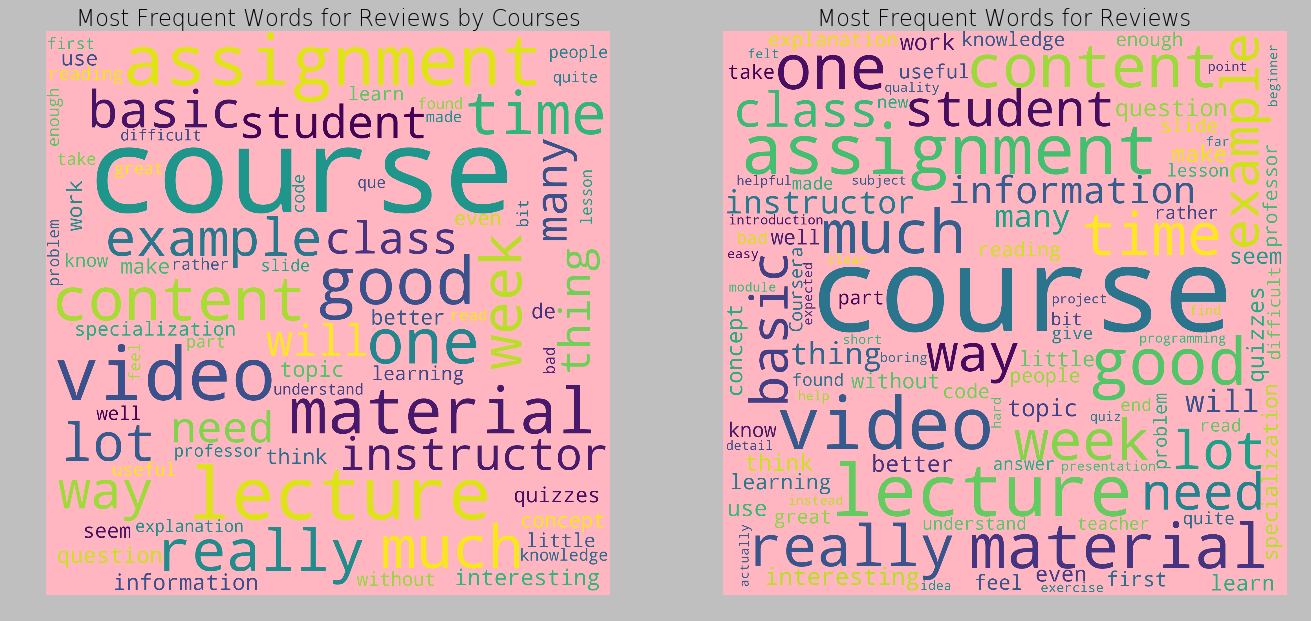

In [18]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (20, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 2]])
wordcloud = WordCloud(background_color = 'lightpink', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 2]])
wordcloud = WordCloud(background_color = 'lightpink', width = 2000, height = 2000, max_words = 100).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20, fontweight = 30)
plt.show()


**Word Cloud for Rating 3**

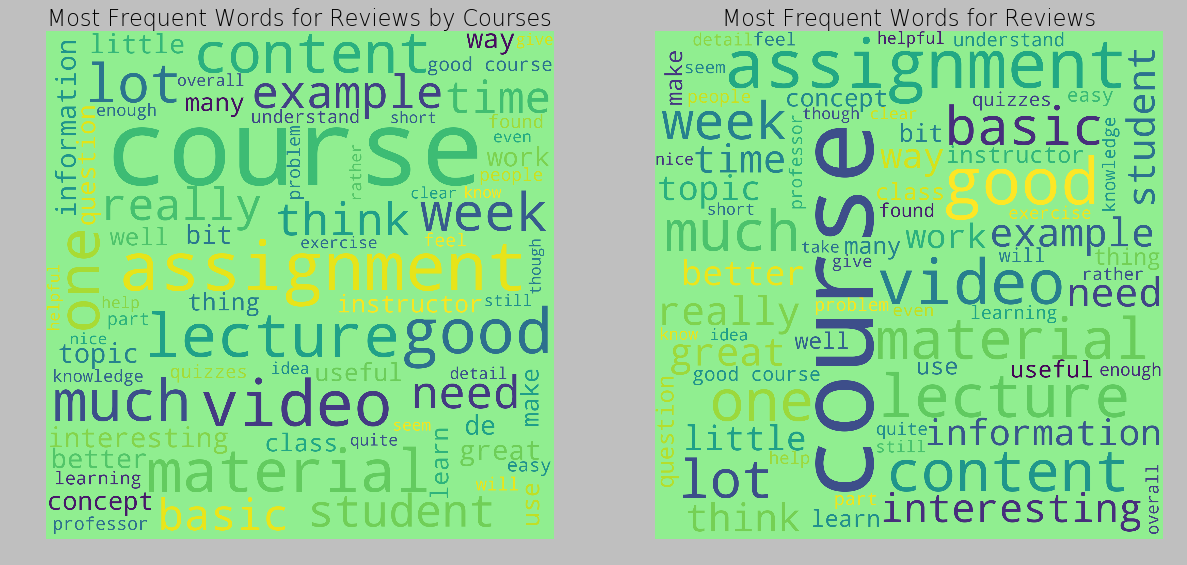

In [19]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 3]])

wordcloud = WordCloud(background_color = 'lightgreen', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 3]])
wordcloud = WordCloud(background_color = 'lightgreen', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20, fontweight = 30)
plt.show()

**Word Cloud for Rating 4**

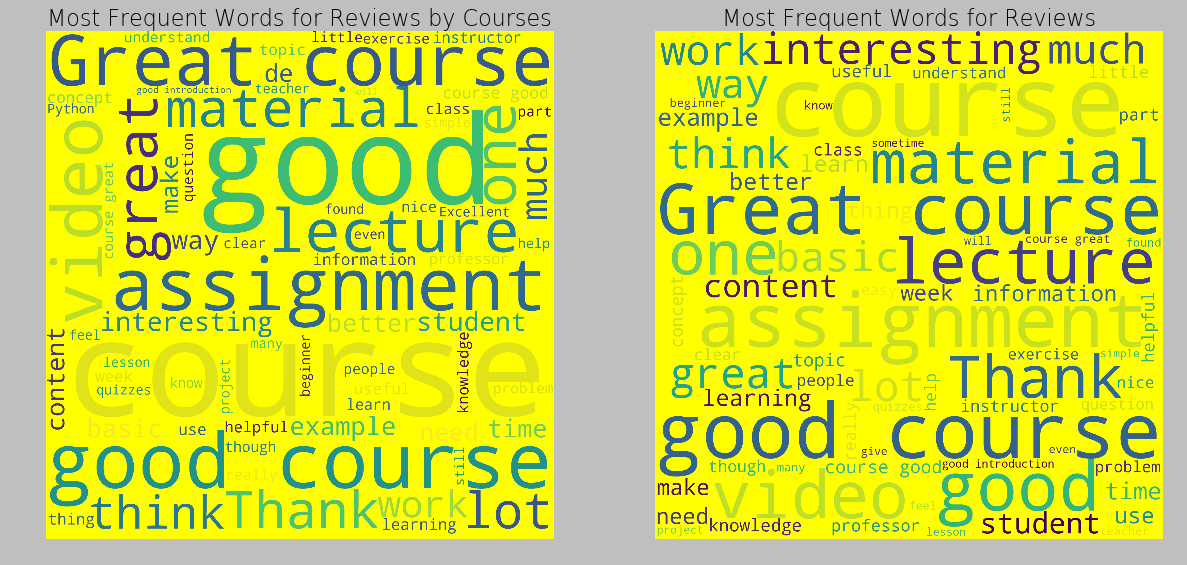

In [20]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 4]])

wordcloud = WordCloud(background_color = 'yellow', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 4]])
wordcloud = WordCloud(background_color = 'yellow', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20, fontweight = 30)
plt.show()


**Word Cloud for Rating 5**

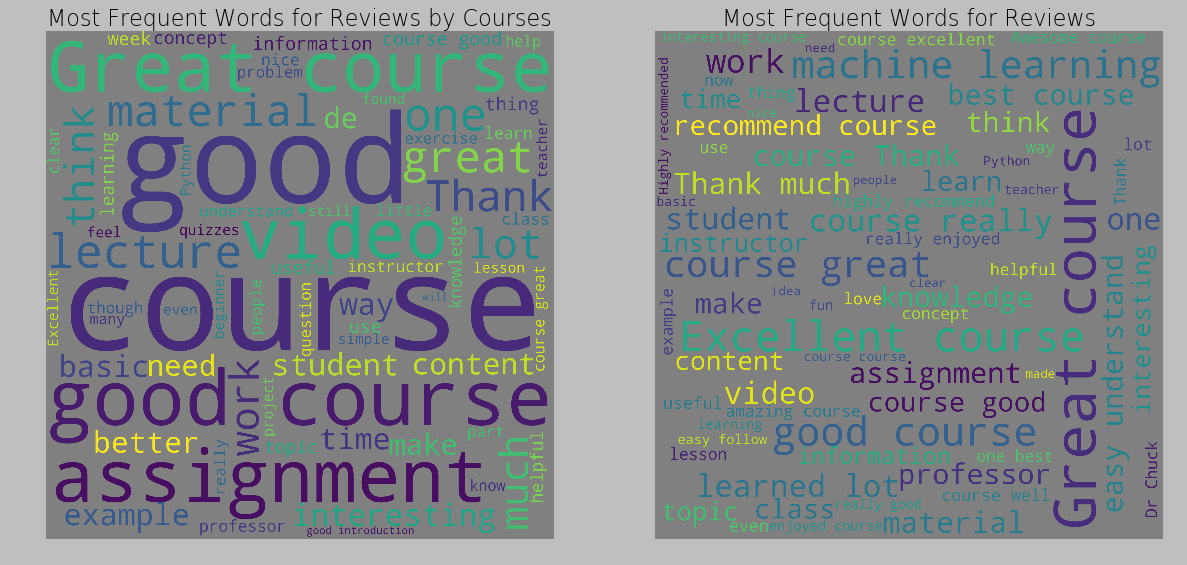

In [21]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 4]])

wordcloud = WordCloud(background_color = 'gray', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 5]])
wordcloud = WordCloud(background_color = 'gray', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20, fontweight = 30)
plt.show()

<img src="https://blog.digitalogy.co/wp-content/uploads/2019/03/Machine-Learning.gif" width="400px">